# sy10yd Example

Johannes Kaisinger, 04 April 2024

The `sy10yd` fits a frequency response to a stable minimum phase SISO system.
This can be seen as a system identification approach.

## Create data

In [19]:
from scipy import signal 
import numpy as np
import matplotlib.pyplot as plt

import slycot

In [20]:
A = np.array([[0.0, 1.0], [-0.5, -0.1]])
B = np.array([[0.0], [1.0]])
C = np.array([[1.0, 0.0]])
D = np.zeros((1,1))

sys_ss = signal.lti(A,B,C,D)
sys_tf = signal.ss2tf(A,B,C,D)
num, den = sys_tf


In [33]:
w, H = signal.freqs(num.squeeze(), den)

real_H_resp = np.expand_dims(np.real(H), axis=(1))
imag_H_resp = np.expand_dims(np.imag(H), axis=(1))

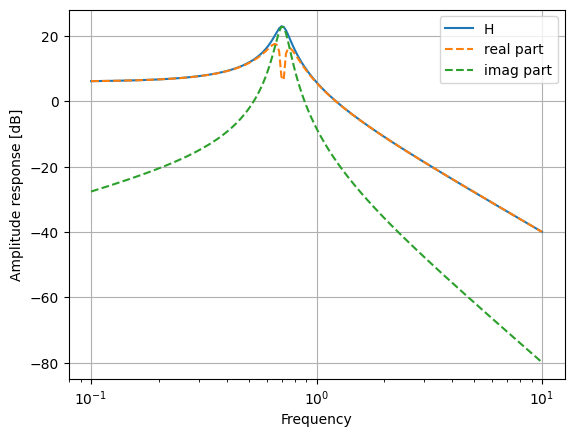

In [32]:
plt.semilogx(w, 20 * np.log10(abs(H)), label="H")
plt.semilogx(w, 20 * np.log10(abs(np.real(H))), linestyle="dashed", label="real part")
plt.semilogx(w, 20 * np.log10(abs(np.imag(H))), linestyle="dashed", label="imag part")
plt.xlabel('Frequency')
plt.ylabel('Amplitude response [dB]')
plt.grid(True)
plt.legend()
plt.show()

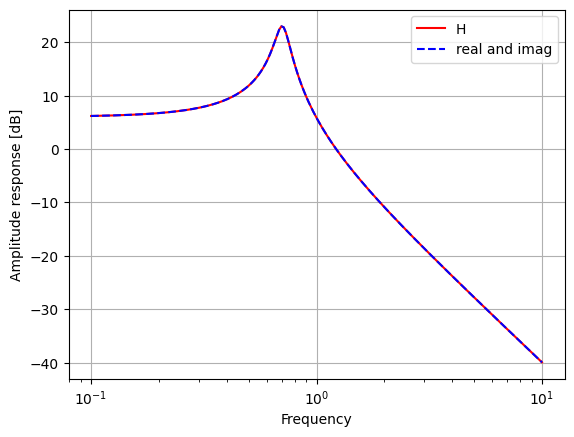

In [29]:
import matplotlib.pyplot as plt
plt.semilogx(w, 20 * np.log10(abs(H)), 'r', label='H')
plt.semilogx(w, 20 * (np.log10(abs(np.sqrt(np.real(H)**2 + np.imag(H)**2))) ), 'b--', label='real and imag')
plt.xlabel('Frequency')
plt.ylabel('Amplitude response [dB]')
plt.grid(True)
plt.legend()
plt.show()

## Systemidentification


In [41]:
omega = w
n = 2
nid, Aid, Bid, Cid, Did = slycot.sb10yd(0, 0, len(omega), real_H_resp, imag_H_resp, omega, 
                               n, tol=0)

print(Aid.shape)
print(Bid.shape)
print(Cid.shape)
print(Did.shape)

(2, 2)
(2, 1)
(1, 2)
(1, 1)


In [38]:
sys_tf_id = signal.ss2tf(Aid,Bid,Cid,Did)
num_id, den_id = sys_tf_id
w_id, H_id = signal.freqs(num_id.squeeze(), den_id, worN=w)

max_rel_error = np.max((abs(H_id) - abs(H))/abs(H))
check_within_bounds = np.allclose(abs(H_id),abs(H),rtol=0.3,atol=0)
print(f"{max_rel_error = }")
print(f"{check_within_bounds = }")

max_rel_error = 0.24744541408298004
check_within_bounds = True


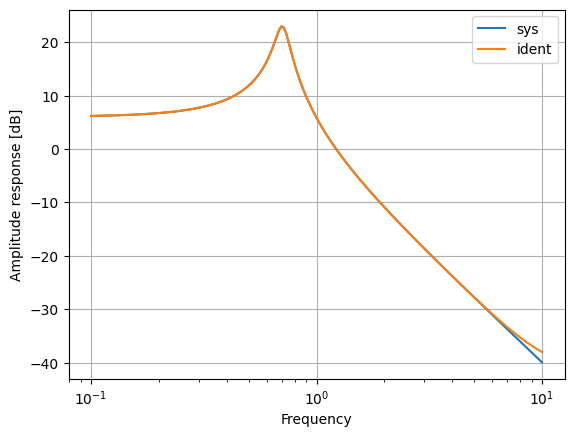

In [26]:
plt.semilogx(w, 20 * np.log10(abs(H)), label="sys")
plt.semilogx(w_id, 20 * np.log10(abs(H_id)), label="ident")
plt.xlabel('Frequency')
plt.ylabel('Amplitude response [dB]')
plt.grid(True)
plt.legend()
plt.show()